In [2]:
#we are  importing numpy(for scientifc computing) and matplotlib(for plotting) libraries of python
import numpy as np 
import matplotlib.pyplot as plt


In [7]:
np.random.seed(0)  # for reproducibility

In [4]:
# dogs: higher ear flappiness index, lower whisker length
dogs_whisker_length = np.random.normal(loc = 5, scale = 1, size = 10 )
dogs_ear_flappiness_index = np.random.normal(loc = 8, scale = 1, size = 10)

In [8]:
# cats: lower ear flappiness index, higher whisker length
cats_whisker_length = np.random.normal(loc = 8, scale = 1, size = 10 )
cats_ear_flappiness_index = np.random.normal(loc = 5, scale = 1, size = 10)

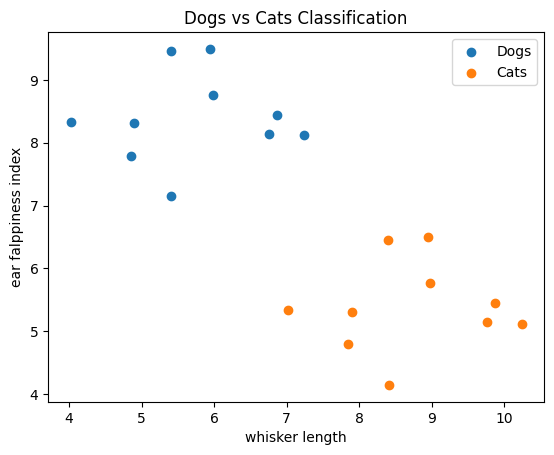

In [10]:
#Plot the data points


plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label = 'Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label = 'Cats')
plt.xlabel('whisker length')
plt.ylabel('ear falppiness index')
plt.title('Dogs vs Cats Classification')
plt.legend()
plt.show()

In [11]:
#Implementing random linear lassifier algorithm
def random_linear_classifier(data_dogs, data_cats, k, d):
    # d is the no of features, in this example, it is 2.
    # we have the equation of a general linear hypothesis which is theta0 + theta1_x1+ theta2_x2=0
    # we can represent it as theta0 + (theta)^T x = 0
    best_error = float('inf')
    best_theta = None
    best_theta0 = None
    
    for _ in range(k):
        theta = np.random.normal(size = d)
        theta0 = np.random.normal()
        
        error = compute_error(data_dogs, data_cats,theta,theta0)
        
        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    
    return    best_theta, best_theta0     
        
        

In [19]:
def compute_error(data_dogs, data_cats,theta,theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <=0:
            error += 1
    
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0:
            error += 1
    
    return error

In [14]:
# Prepare data for algorithm
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T

In [15]:
#Run the algorithm
k = 100  # No of iterations
d = 2    # No of features

best_theta, best_theta0 = random_linear_classifier(dogs_data, cats_data, k, d)


In [24]:
# Plot the decision boundary

x_vals = np.linspace(2, 10, 100)
y_vals = (-best_theta[0]/ best_theta[1]) * x_vals -(best_theta0/ best_theta[1])


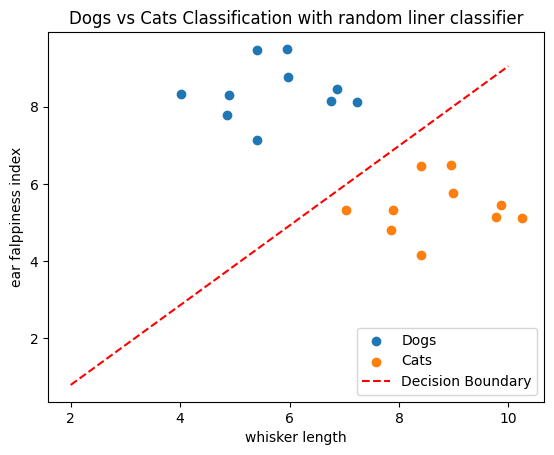

In [29]:
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label = 'Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label = 'Cats')
plt.plot(x_vals, y_vals,color = 'red', linestyle = '--', label = 'Decision Boundary')
plt.xlabel('whisker length')
plt.ylabel('ear falppiness index')
plt.title('Dogs vs Cats Classification with random liner classifier')
plt.legend()
plt.show()